# Множественная линейная регрессия (Multiple linear regression)

---

**Источники:**


[UNDERSTANDING MULTI-DIMENSIONAL LINEAR REGRESSION, CLOSED FORM](https://www.easymachinelearning.net/introml/understanding-multi-dimensional-linear-regression-and-polynomial-regression/)

[Классическое машинное обучение: задачи классификации, обобщения, кластеризации данных](https://evergreens.com.ua/ru/articles/classical-machine-learning.html)

[Множественная линейная регрессия (Multiple Linear Regression)](https://wiki.loginom.ru/articles/multiple-linear-regression.html)

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

In [7]:
import sklearn

sklearn.__version__

'0.24.1'

## Загрузка данных

[Источник (FuelConsumption)](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [8]:
df = pd.read_csv("./../../data/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## Множественная линейная регрессия (Multiple linear regression)

**Множественной называют линейную регрессию, в модели которой число независимых переменных две или более.**

Отличие между простой и множественной линейной регрессией заключается в том, что вместо линии регрессии в ней используется гиперплоскость.


$y=b_{0} + b_{1}x_{1} + b_{2}x_{2} + b_{3}x_{3} + b_{4}x_{4} + ...$

$y$ - зависимая переменная, что мы измеряем в эксперименте (dependent variable)

$b_{0}$ - показывает, чему равна зависимая переменная, если предиктор равен нулю (intercept)

$x_{n}$ - независимая переменная (independent variable)

$b_{n}$ - показывает, насколько изменяется зависимая переменная при изменении независимой переменной (coef | slope)


Параметры модели $b_{n}$ вычисляются при помощи метода наименьших квадратов (Ordinary Least Squares).

<center><img src="images/simple_multiple_linear_regression.png" alt="simple_multiple_linear_regression" width=700 height=700"/></center>

---

## 3D

## Обучение модели (Train)

In [9]:
# разделить независимую и зависимую переменные / train и test

from sklearn.model_selection import train_test_split

y = df['CO2EMISSIONS'].copy()
X = df[['ENGINESIZE', 'CYLINDERS']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# обучить модель
multiple_regr.fit(X_train, y_train)

# вывести результаты обучения
print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

Coefficients:  [29.60257275  7.98222693]
Intercept:  111.78462166596603


## Оценка качества модели (Evaluation)

In [11]:
# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(X_test)

# вывести результаты предсказания
print(f'Variance score: {multiple_regr.score(X_test, y_test)}')    # Coefficient of determination R^2 of the prediction
print(f"Residual sum of squares: {np.mean((y_predicted - y_test) ** 2)}")    # MSE

Variance score: 0.7772369102509163
Residual sum of squares: 907.1518149892986


In [12]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_predicted)    # эквивалентно regr.score(x, y)

0.7772369102509163

In [13]:
y_train_predicted = multiple_regr.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_predicted)

0.7699967016542022

In [14]:
from sklearn.metrics import mean_squared_error

# MSE
mean_squared_error(y_true=y_test, y_pred=y_predicted, squared=True)   # эквивалентно np.mean((y_predicted - y) ** 2)

907.1518149892979

## Визуализация (Visualization)

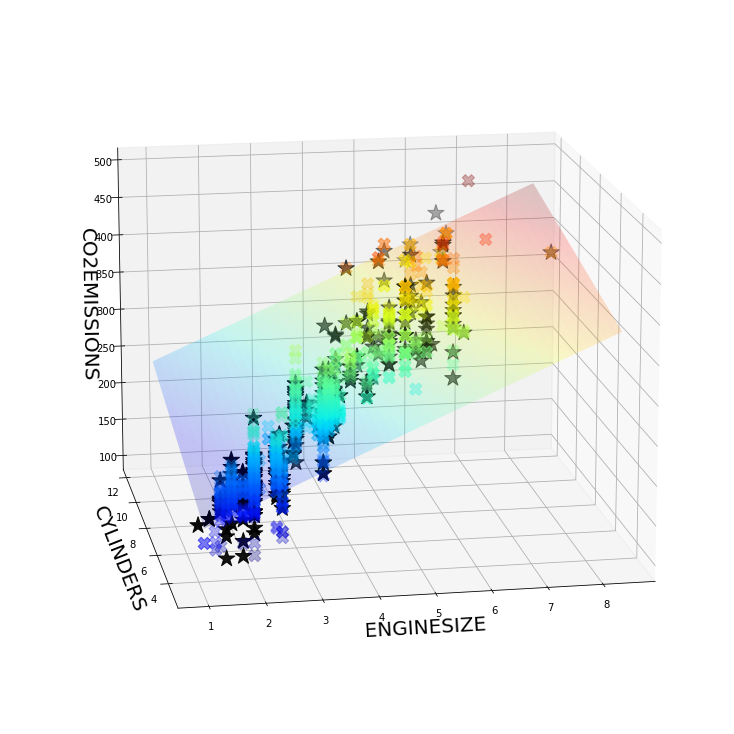

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15, 10))

ax = Axes3D(fig, azim=-100, elev=15)

# Тестовые данные
ax.scatter3D(X_test.ENGINESIZE, 
             X_test.CYLINDERS, 
             y_test, 
             marker='*', 
             color='black',
             s=300,
             facecolor='black')

# Данные для обучения модели
ax.scatter3D(X_train.ENGINESIZE, 
             X_train.CYLINDERS, 
             y_train, 
             c = y_train, 
             marker='X', 
             cmap='jet',    # https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
             s=150,
             alpha=0.3)



ax.set_xlabel('ENGINESIZE', fontsize=20)
ax.set_ylabel('CYLINDERS', fontsize=20)
ax.set_zlabel('CO2EMISSIONS', fontsize=20)

x_span = np.linspace(X_train.ENGINESIZE.min(), X_train.ENGINESIZE.max())
y_span = np.linspace(X_train.CYLINDERS.min(), X_train.CYLINDERS.max())
x_span, y_span = np.meshgrid(x_span, y_span)

Z = multiple_regr.intercept_ + multiple_regr.coef_[0] * x_span + multiple_regr.coef_[1] * y_span

surf = ax.plot_surface(x_span, y_span, Z, cmap='jet', alpha=0.2, linewidth=0)

---

## 4D

## Обучение модели (Train)

In [16]:
# разделить независимую и зависимую переменные / train и test

y = df['CO2EMISSIONS'].copy()
X = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# обучить модель
multiple_regr.fit(X_train, y_train)

# вывести результаты обучения
print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

Coefficients:  [10.94928339  7.09566693  9.75665944]
Intercept:  66.08405043684945


## Оценка качества модели (Evaluation)

In [18]:
# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(X_test)

# вывести результаты предсказания
print(f'Variance score: {multiple_regr.score(X_test, y_test)}')    # Coefficient of determination R^2 of the prediction
print(f"Residual sum of squares: {np.mean((y_predicted - y_test) ** 2)}")    # MSE

Variance score: 0.8666796758100375
Residual sum of squares: 542.9165765303072


In [19]:
r2_score(y_true=y_test, y_pred=y_predicted)    # эквивалентно regr.score(x, y)

0.8666796758100375

In [20]:
y_train_predicted = multiple_regr.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_predicted)

0.862413314011362

In [21]:
# MSE
mean_squared_error(y_true=y_test, y_pred=y_predicted, squared=True)   # эквивалентно np.mean((y_predicted - y) ** 2)

542.9165765303072

## Визуализация (Visualization)

Начиная с 4D (четырёхмерное пространство) невозможно представить зрительно (визуализировать результат).